## Leetcode

1235. Maximum Profit in Job Scheduling

https://leetcode.com/problems/maximum-profit-in-job-scheduling/description/?envType=daily-question&envId=2024-01-06

**Description**
    
    We have n jobs, where every job is scheduled to be done from startTime[i] to endTime[i], obtaining a profit of profit[i].
    
    You're given the startTime, endTime and profit arrays, return the maximum profit you can take such that there are no two jobs in the subset with overlapping time range.
    
    If you choose a job that ends at time X you will be able to start another job that starts at time X.


**Examples**

    Example 1:
    
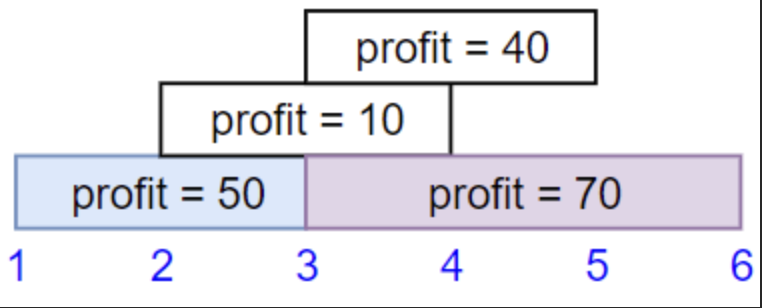    
    
    Input: startTime = [1,2,3,3], endTime = [3,4,5,6], profit = [50,10,40,70]
    Output: 120
    Explanation: The subset chosen is the first and fourth job. 
    Time range [1-3]+[3-6] , we get profit of 120 = 50 + 70.
    
    Example 2:
    
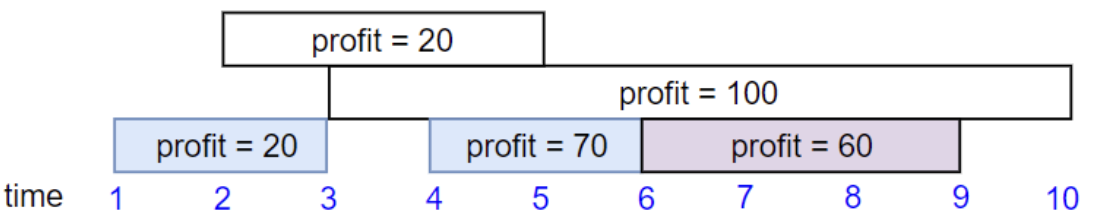    
    
    Input: startTime = [1,2,3,4,6], endTime = [3,5,10,6,9], profit = [20,20,100,70,60]
    Output: 150
    Explanation: The subset chosen is the first, fourth and fifth job. 
    Profit obtained 150 = 20 + 70 + 60.
    
    Example 3:

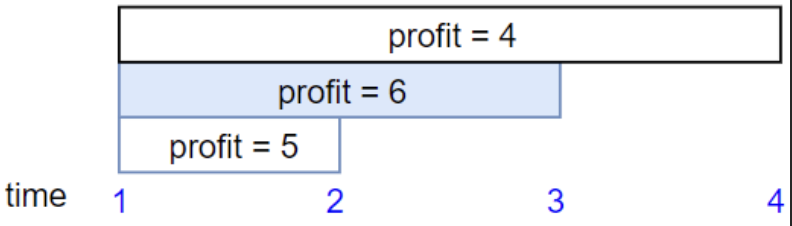

    Input: startTime = [1,1,1], endTime = [2,3,4], profit = [5,6,4]
    Output: 6
 

**Constraints**

    1 <= startTime.length == endTime.length == profit.length <= 5 * 10^4
    1 <= startTime[i] < endTime[i] <= 10^9
    1 <= profit[i] <= 10^4

In [6]:
class Solution:
    def jobScheduling(self, startTime: list[int], endTime: list[int], profit: list[int]) -> int:
        
        def binary_search(dp, target):
            low, high = 0, len(dp)-1

            while low<=high:
                mid = (low+high)//2
                if dp[mid][0] <=target:
                    low = mid+1
                else:
                    high = mid-1

            return high

        jobs = sorted(zip(startTime, endTime, profit), key= lambda x: x[1])
        dp = [(0,0)]

        for start,end,profit in jobs:
            i = binary_search(dp,start)
            cur_profit = dp[i][1] + profit
            max_profit = max(cur_profit, dp[-1][1])
            dp.append((end,max_profit))
        return dp[-1][1]
